In [2]:
# Project 2:
# Detect flowers based on images

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [12]:
X=[]
Z=[]
IMG_SIZE=150

FLOWER_DAISEY_DIR ="C:/Users/mohan/Desktop/batch 4/archive (4)-20240219T143544Z-001/archive (4)/train/daisy"
FLOWER_SUNFLOWER_DIR ="C:/Users/mohan/Desktop/batch 4/archive (4)-20240219T143544Z-001/archive (4)/train/sunflower"
FLOWER_TULIP_DIR = "C:/Users/mohan/Desktop/batch 4/archive (4)-20240219T143544Z-001/archive (4)/train/tulip"
FLOWER_DANDI_DIR ="C:/Users/mohan/Desktop/batch 4/archive (4)-20240219T143544Z-001/archive (4)/train/dandelion"
FLOWER_ROSE_DIR = "C:/Users/mohan/Desktop/batch 4/archive (4)-20240219T143544Z-001/archive (4)/train/rose"

In [13]:
def assign_label(img, flower_type):
  return flower_type

In [14]:
# tqdm --> It creates a progress bar from the loop
def make_train_data(flower_type, DIR):
  for img in tqdm(os.listdir(DIR)):
    label = assign_label(img, flower_type)
    path = os.path.join(DIR, img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    X.append(np.array(img))
    Z.append(str(label))

In [15]:
make_train_data('Daisy', FLOWER_DAISEY_DIR)
print(len(X))

100%|█████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<00:00, 142.71it/s]

66


In [16]:
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 495/495 [00:03<00:00, 141.26it/s]

561


In [17]:
make_train_data('Tulip', FLOWER_TULIP_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 610/610 [00:04<00:00, 138.47it/s]

1171


In [18]:
make_train_data('Dandelion', FLOWER_DANDI_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████████| 656/656 [00:12<00:00, 52.07it/s]

1827


In [19]:
make_train_data('Rose', FLOWER_ROSE_DIR)
print(len(X))

100%|███████████████████████████████████████████████████████████████████████████████| 497/497 [00:03<00:00, 152.16it/s]

2324


C:\Users\mohan\AppData\Local\Temp\ipykernel_18652\3155540616.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


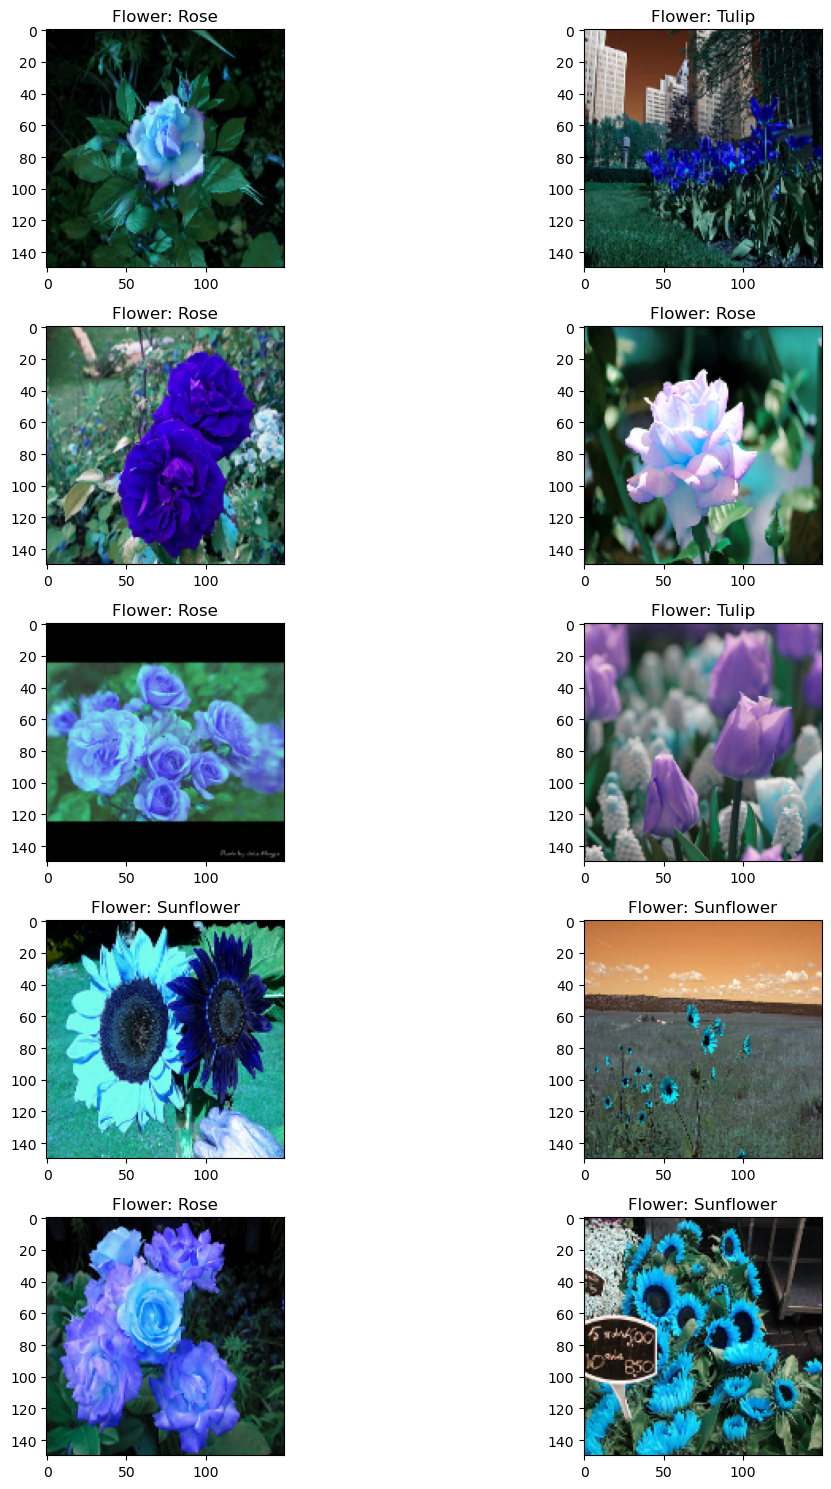

In [11]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for row in range(5):
  for col in range(2):
    l= rn.randint(0, len(Z))
    ax[row, col].imshow(X[l])
    ax[row, col].set_title("Flower: "+Z[l])

  plt.tight_layout()